# Домашнее задание по курсу анализа данных # 2
Версия от 14.11.2021

Всего 50 баллов = 50 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 06.12.2021  23:59**

**Жесткий дедлайн: 11.12.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

# Парсим рейтинг преподавателей с Вики-Физтех

<div class="alert alert-info">
    
Итак, перед вами **VIKI-MIPT** - сборник отзывов о кафедрах и преподавателях МФТИ: ` http://wikimipt.org/wiki/ `

Эта кладезь отзывов не раз давала студентам оценить психологический портрет потенциальных экзаменаторов и преподавателей. 
    
    
<img src="https://github.com/Gerakir/mipt_data_science_2021/blob/main/lessons/images/wiki_mipt_front.PNG?raw=1" height="300" width="1300"> 



# Описание задачи: 

**Задача** - собрать данные по всем текущим преподавателям всех `институтских кафедр` МФТИ.

Собранный датасет должен представлять из себя `.csv` файл со следующими полями:

* `full_name` - ФИО преподавателя
* `birth_day` - Дата рождения преподавателя
*  `teach_place` - Кафедра
*  `degree`- Ученая Степень
* `knowledge` - Знания
*  `teaching_skill` - Умение преподавать	
* `commication_skill` - В общении	
* `easy_exam` - «Халявность»	
* `overall_score` - Общая оценка

<img src="https://github.com/Gerakir/mipt_data_science_2021/blob/main/lessons/images/wiki_mipt_info.PNG?raw=1" height="300" width="300"> 

**Комментарий:** - Знание, умение преподавать, в общение, "Халявность" и Общая оценка можно найти странице каждого преподавателя. 

<div class="alert alert-warning">
    
Финальный балл складывается из трех частей:

* Cобранный датасет (выложить архивом на гитхаб)
* python кода, которым был собран датасет (выложить на гитхаб)
* Окуратный и понятный код с комментариями
    
    
**Дополнительные + 10 баллов можно получить за кластеризацию преподавателей, используя только оценки из собранных данных**

# Возможный алгоритм обхода для сбора данных:

In [ ]:
# 0 - Открываем с помощью Selenium клавную страницу вики-Физтех- http://wikimipt.org/wiki/   
# 1 - Получаем список кафедр с главной страницу вики-Физтех    
# Обходя список кафедр, "проваливаемся" в каждую страницу кафедру кликом по названию кафедры
#     2 - Получаем список преподавателей
#         Обходя список преподавателей "Проваливаемся" на страницу преподавателя по ФИО преподавателя
#             3 - Получаем табличку данных с характеристмиками преподавателями и прочу необходимую информацию. 
#             Записываем в pandas dataframe
# Сохраняем данные в .csv файл

# Вспомогательные элементы для майнинга данных

* Библиотека `Selenium`: https://selenium-python.readthedocs.io/

Полезные методы и рекомендации:
    
* `element = browser.find_elements_by_*что угодно*()` # Поиск элемента на странице
* `element.click()` # Кликнуть по элементу (провалится по ссылке / расскрыть банер)
* `browser.back()` # Вернуться назад 
* `pd.read_html()` # Способ загрузить таблицку из html сразу в Pandas
* Спрашивать в чате или гуглить

# Работа

##  Посмотрим на код заглавной страницы

In [1]:
import requests
from bs4 import BeautifulSoup

URL = 'http://wikimipt.org/wiki/'
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>викиФизтех</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>window.RLQ = window.RLQ || []; window.RLQ.push( function () {
mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Заглавная_страница","wgTitle":"Заглавная страница","wgCurRevisionId":9210,"wgRevisionId":9210,"wgArticleId":1,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":[],"wgBreakFrames":!1,"wgPageContentLanguage":"ru","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апрель","май","июнь","июль","август","сентябрь","октябрь","ноябрь","декабрь"],"wgMonthNamesShort":["","янв

## Посмотрим на код страницы какой-нибудь кафедры

In [2]:
URL1 = 'http://wikimipt.org/wiki/Кафедра_высшей_математики'
page1 = requests.get(URL1)
soup1 = BeautifulSoup(page1.content, 'html.parser')
soup1

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="ru">
<head>
<meta charset="utf-8"/>
<title>Кафедра высшей математики — вики-Физтех. О преподавателях МФТИ и не только!</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>window.RLQ = window.RLQ || []; window.RLQ.push( function () {
mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Кафедра_высшей_математики","wgTitle":"Кафедра высшей математики","wgCurRevisionId":12534,"wgRevisionId":12534,"wgArticleId":23,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Кафедры по алфавиту"],"wgBreakFrames":!1,"wgPageContentLanguage":"ru","wgPageContentModel":"wikitext","wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","январь","февраль","март","апр

## Обратимся к функционалу Selenium

### Устанавливаем нужные модули

In [3]:
!pip install selenium

     |████████████████████████████████| 958 kB 11.4 MB/s 
     |████████████████████████████████| 356 kB 74.2 MB/s 
     |████████████████████████████████| 138 kB 58.8 MB/s 
     |████████████████████████████████| 3.6 MB 33.8 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
!pip install webdriver-manager

     |████████████████████████████████| 127 kB 22.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [5]:
!pip install --upgrade ChromeDriver

     |████████████████████████████████| 14.3 MB 9.7 MB/s 


### Проблемы с webdriver'ом в Google Colab

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path_CDM

'/content/drive/My Drive/data/chromedriver'

In [ ]:
path_CDM = '/content/drive/My Drive/Data/chromedriver.exe'  # Загрузка в колаб исполнительных файлов разных версий не помогла
CDM = webdriver.Chrome(path_CDM) 

URL = 'http://wikimipt.org/wiki/'
CDM.get(URL)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


WebDriverException: ignored

### Решение проблем с webdriver'ом

In [6]:
!pip install kora -q  # Библиотека для решения данной как раз проблемы (https://stackoverflow.com/questions/51046454/how-can-we-use-selenium-webdriver-in-colab-research-google-com)
from kora.selenium import wd


     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 56 kB 4.9 MB/s 


In [7]:
URL = 'http://wikimipt.org/wiki/'
wd.get(URL)
wd.implicitly_wait(3)

### Обработка кода страницы

In [8]:
from tqdm import tqdm
import time
import pandas as pd

In [9]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [10]:
departments = wd.find_elements(By.PARTIAL_LINK_TEXT, 'Кафедра')
time.sleep(1)
departments.append(wd.find_element(By.PARTIAL_LINK_TEXT, 'кафедра'))
time.sleep(1)
departments.append(wd.find_element(By.PARTIAL_LINK_TEXT, 'школа'))
time.sleep(1) 

In [11]:
departments

[<a href="/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%B2%D1%8B%D1%81%D1%88%D0%B5%D0%B9_%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B8" title="Кафедра высшей математики">Кафедра высшей математики</a>,
 <a href="/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%BE%D0%B1%D1%89%D0%B5%D0%B9_%D1%84%D0%B8%D0%B7%D0%B8%D0%BA%D0%B8" title="Кафедра общей физики">Кафедра общей физики</a>,
 <a href="/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%BE%D0%B1%D1%89%D0%B5%D0%B9_%D1%85%D0%B8%D0%BC%D0%B8%D0%B8" title="Кафедра общей химии">Кафедра общей химии</a>,
 <a href="/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B8" title="Кафедра информатики">Кафедра информатики</a>,
 <a href="/wiki/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%B8%D0%BD%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D1%8F%D0%B7%D1%8B%D0%BA%D0%BE%D0%B2" title="Кафедра иностранных языков">Кафедра иностранных языков</a>,
 <a href

#### Избавимся от лишних кафедр

Лишнимим можно считать кафедру ***биофизики и экологии*** (страница отсутсвтует) и кафедры ***физики твёрдого тела*** и **физики высокотемпературных процессов**: они отсутствуют в основной таблице кафедр, а попались нам из дополнительных списков внизу страницы. Последние 2 кафедры можно и не удалять, но никакой полезной нам информации на их страницах почти нет.

UPD: Решил всё-таки пока последние 2 кафедры не удалять.

In [12]:
departments.pop(12)

<a href="/wiki/%D0%A1%D0%BB%D1%83%D0%B6%D0%B5%D0%B1%D0%BD%D0%B0%D1%8F:FormEdit/Кафедра/%D0%9A%D0%B0%D1%84%D0%B5%D0%B4%D1%80%D0%B0_%D0%B1%D0%B8%D0%BE%D1%84%D0%B8%D0%B7%D0%B8%D0%BA%D0%B8_%D0%B8_%D1%8D%D0%BA%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D0%B8?redlink=1" class="new" title="Кафедра биофизики и экологии (страница не существует)">Кафедра биофизики и экологии</a>

### Напишем код для сбора информации

In [13]:
departments_text = [i.text for i in departments]
print(departments_text)

['Кафедра высшей математики', 'Кафедра общей физики', 'Кафедра общей химии', 'Кафедра информатики', 'Кафедра иностранных языков', 'Кафедра вычислительной математики', 'Кафедра теоретической физики', 'Кафедра теоретической механики', 'Кафедра радиотехники и телекоммуникаций', 'Кафедра прикладной механики', 'Кафедра права', 'Кафедра физического воспитания и спорта', 'Кафедра системного анализа экономики', 'Кафедра философии', 'Кафедра физики твёрдого тела', 'Кафедра физики высокотемпературных процессов', 'Военная кафедра', 'Высшая школа системного инжиниринга']


In [14]:
departments_num = len(departments)
departments_num

18

#### Опишем пути к преподавателям

К сожалению, не на разнах стараницах пути к преподавателям могут отличаться.

In [15]:
teach_paths = ['']*departments_num
different_paths_1 = {12, 14, 16}
different_paths_2 = {0, 1}
for i in range(departments_num):
  if i in different_paths_1:
    teach_paths[i] = '/html/body/div[3]/div[2]/div[4]/div[5]/ul/li'
  else:
    teach_paths[i] = '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li'

In [ ]:
2     /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]   /div/div[2]
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]   /div/div[2]/p/a
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p
      /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p
11    /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a
13    /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a
15    /html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a
17    /html/body/div[3]/div[2]/div[4]/div[3]/ul/li/div/div[2]/p/a

12    /html/body/div[3]/div[2]/div[4]/div[5]/ul/li[1]   /div/div[2]/p/a
14    /html/body/div[3]/div[2]/div[4]/div[5]/ul/li/div    /div[2]/p/a
16    /html/body/div[3]/div[2]/div[4]/div[5]/ul/li[1]   /div/div[2]/p/a

/html/body/div[3]/div[2]/div[4]/div[3]/ul/li[1]/div/div[2]/p/a

In [16]:
teach_paths

['/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[5]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[5]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[5]/ul/li',
 '/html/body/div[3]/div[2]/div[4]/div[3]/ul/li']

#### Основной цикл

In [17]:
import numpy as np
import pandas as pd

In [37]:
 def find_teachers(j):  # Находим преподавателей в пределах одной кафедры и собираем информацию о них с помощью функции take_info(teacher)  
  i = 1
  while i:
    try:
      teach_path = teach_paths[j] + '[{number}]'.format(number=i)
      if j in different_paths_2:
        teach_path = teach_path + '/a'
      else:
        teach_path = teach_path + '/div/div[2]/p/a'
      teacher = wd.find_element(By.XPATH, teach_path)
      time.sleep(1)
      take_info(teacher)  # Собираем информацию об определённом преподавателе
    except:
      break
    finally:
      i += 1

In [19]:
def toFloat(value_taken):  # У некоторых преподавателей нет оценок в той или иной категории, поэтому для успешного перевода
    try:                   # строки в число в любом случае прибегаем к такому ухищрению
        value = float(value_taken)
    except ValueError:
        value = np.nan
    return value

In [38]:
def take_info(teacher):  # Собираем информацию о преподавателе
  global full_names_
  full_names_ = np.append(full_names_, teacher.text)
  
  teacher.click()
  table =  wd.find_elements(By.XPATH, '//*[@id="mw-content-text"]/table')
  time.sleep(1)
  df = pd.read_html(table[0].get_attribute('outerHTML'))[0]
  time.sleep(1)

  teach_place = df[df[0] == "Работает"][1].values
  degree = df[df[0] == "Учёная степень"][1].values
  if len(degree) == 0:
    degree = np.nan
  knowledge = round(toFloat(df[df[0] == "Знания"][1].values[0].split()[0]) - 12340, 2)
  teaching_skill = round(toFloat(df[df[0] == "Умение преподавать"][1].values[0].split()[0]) - 12340, 2)
  communication_skill = round(toFloat(df[df[0] == "В общении"][1].values[0].split()[0]) - 12340, 2)
  easy_exam = round(toFloat(df[df[0] == "«Халявность»"][1].values[0].split()[0]) - 12340, 2)
  overall_score = round(toFloat(df[df[0] == "Общая оценка"][1].values[0].split()[0]) - 12340, 2)

  global teach_places_
  teach_places_ = np.append(teach_places_, teach_place)
  global degrees_
  degrees_ = np.append(degrees_, degree)
  global knowledges_
  knowledges_ = np.append(knowledges_, knowledge)
  global teaching_skills_
  teaching_skills_ = np.append(teaching_skills_, teaching_skill)
  global communication_skills_
  communication_skills_ = np.append(communication_skills_, communication_skill)
  global easy_exams_
  easy_exams_ = np.append(easy_exams_, easy_exam)
  global overall_scores_
  overall_scores_ = np.append(overall_scores_, overall_score)
  
  wd.back()

In [45]:
full_names_ = ['']
teach_places_ = ['']
degrees_ = ['']
knowledges_ = [0]
teaching_skills_ = [0]
communication_skills_ = [0]
easy_exams_ = [0]
overall_scores_ = [0]

for i in range(departments_num):
  departments = wd.find_elements(By.PARTIAL_LINK_TEXT, 'Кафедра')  # Объяснение, почему каждый раз нужно переискивать ссылки, нашёл в решении следующий проблемы: https://automated-testing.info/t/obshhij-algoritm-resheniya-element-is-not-attached-to-page-document/13003
  time.sleep(1)
  departments.append(wd.find_element(By.PARTIAL_LINK_TEXT, 'кафедра'))
  time.sleep(1)
  departments.append(wd.find_element(By.PARTIAL_LINK_TEXT, 'школа'))
  time.sleep(1)
  del departments[12]
  #print(departments[i])
   
  departments[i].click()
  find_teachers(i)
  wd.back()

data = pd.DataFrame({'full_name': full_names_, 'teach_place': teach_places_, 'degree': degrees_, 'knowledge': knowledges_, 'teaching_skill': teaching_skills_, 'commication_skill': communication_skills_, 'easy_exam': easy_exams_, 'overall_score': overall_scores_})

In [46]:
full_names_

array(['', 'Агаханов Назар Хангельдыевич', 'Агаханова Яна Сергеевна',
       'Алексеев Василий Антонович', 'Амосов Григорий Геннадьевич',
       'Андреев Михаил Юрьевич', 'Арутюнов Андроник Арамович',
       'Арутюнов Арам Владимирович', 'Астафуров Глеб Олегович',
       'Балабанов Юрий Вячеславович', 'Балицкий Алексей Михайлович',
       'Беляев Виссарион Викторович', 'Беляев Сергей Анатольевич',
       'Бесов Олег Владимирович', 'Беспорточный Александр Иванович',
       'Бишаев Александр Михайлович', 'Богданов Илья Игоревич',
       'Боговский Михаил Евгеньевич', 'Браницкая Лидия Леонидовна',
       'Булинский Андрей Вадимович', 'Бунаков Андрей Эрикович',
       'Бурмистров Александр Николаевич', 'Бурский Владимир Петрович',
       'Бурцев Алексей Анатольевич', 'Бычков Алексей Станиславович',
       'Висков Олег Викторович', 'Волков Борис Олегович',
       'Габдурафикова (Кочерова) Анна Сергеевна',
       'Гарбер Алексей Игоревич', 'Гимадеев Ренат Айратович',
       'Глухов Илья Викт

In [50]:
data

,full_name,teach_place,degree,knowledge,teaching_skill,commication_skill,easy_exam,overall_score
0,,,,0.00,0.00,0.00,0.00,0.00
1,Агаханов Назар Хангельдыевич,Кафедра высшей математики,Кандидат физико-математических наук (1988),4.86,4.77,4.79,4.25,4.79
2,Агаханова Яна Сергеевна,Кафедра высшей математики,Кандидат физико-математических наук (2007),4.51,4.63,4.85,4.81,4.81
3,Алексеев Василий Антонович,Кафедра высшей математики Кафедра информатики,NaN,4.67,4.33,4.50,4.17,4.67
4,Амосов Григорий Геннадьевич,Кафедра высшей математики,Доктор физико-математических наук,4.42,3.42,4.33,4.44,4.00
...,...,...,...,...,...,...,...,...
745,Иванов Юрий Григорьевич,Военная кафедра,NaN,5.00,5.00,5.00,5.00,5.00
746,Кваченко Андрей Владимирович,Военная кафедра,кандидат технических наук,3.50,3.00,2.50,3.50,3.50
747,Корнеев Виктор Александрович,Военная кафедра,NaN,5.00,5.00,5.00,4.00,5.00
748,Летуновский Сергей Владимирович,Военная кафедра,NaN,3.00,3.00,3.00,2.00,3.00


In [51]:
data1 = data

In [68]:
data1 = data1.drop(labels=0, axis=0)

In [71]:
data1.to_csv('data.csv')

In [55]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [72]:
!cp data.csv "/content/drive/My Drive/Data"

## Попробуем выделить кластеры

In [57]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [73]:
data4clust = data1

In [79]:
data4clust = data4clust.drop(['full_name', 'teach_place', 'degree'], axis=1)

In [84]:
data4clust = data4clust.fillna(0)

In [86]:
import matplotlib.pyplot as plt 

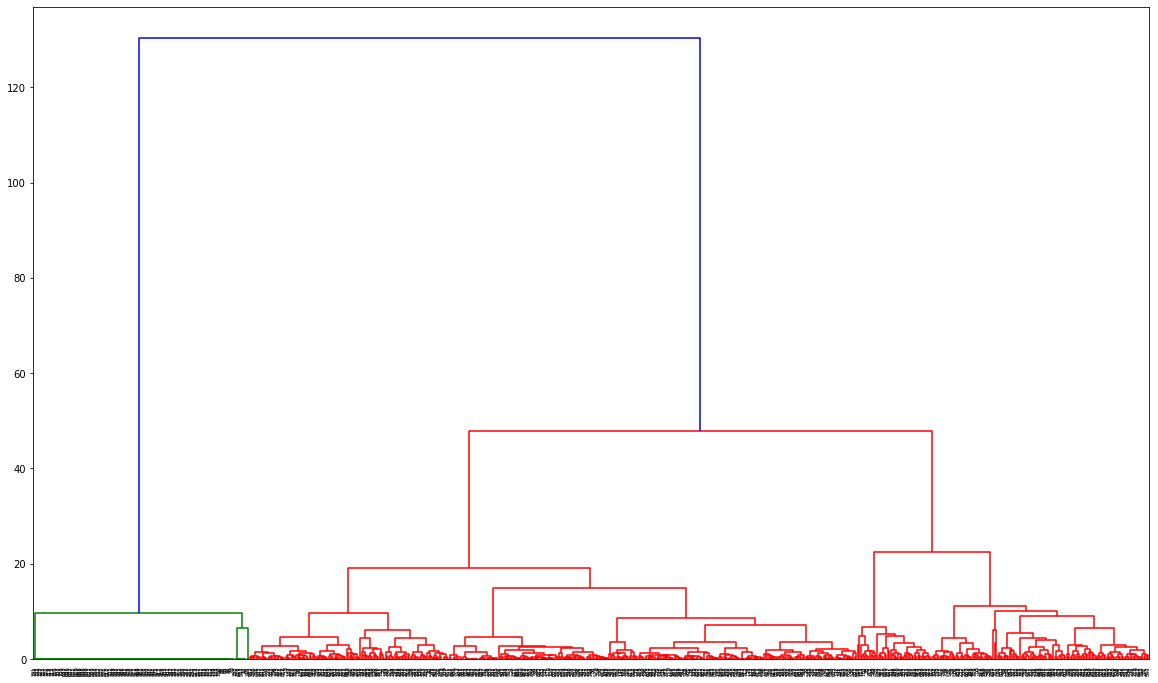

In [87]:
Z = linkage(data4clust, 'ward')
plt.figure(figsize=(20,12))
dendrogram(Z)
plt.show()

In [95]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=6, max_iter=50000)
cluster_labels = clusterer.fit_predict(data4clust)

In [89]:
from sklearn.manifold import TSNE

data4clust1 = TSNE(n_components=2, learning_rate='auto', n_jobs=-1, 
                 init='random').fit_transform(data4clust)

In [90]:
data4clust1

array([[31.371735  , -2.8296566 ],
       [30.897604  , -8.732463  ],
       [24.524813  , -4.3780065 ],
       ...,
       [33.720665  , -0.49204573],
       [-8.003166  ,  6.942056  ],
       [-8.179613  ,  4.0910587 ]], dtype=float32)

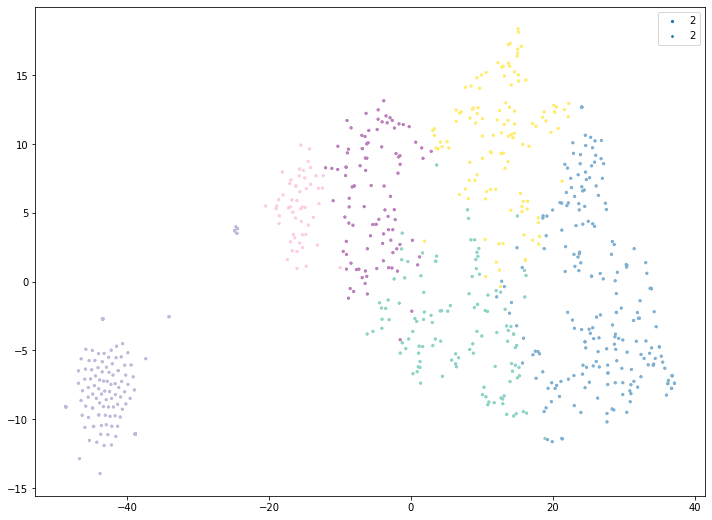

In [97]:
plt.figure(figsize=(12,9))
plt.scatter(data4clust1[:,0], data4clust1[:,1], c=cluster_labels, cmap ='Set3', s=5)
plt.scatter(data4clust1[:,0], data4clust1[:,1], c=cluster_labels, s=3, cmap ='Set3')
plt.legend(cluster_labels)
plt.show()